# Exploring how to deal with three composition layers: 

goods, substances, and conserved constituents

## Imports and helper functions

In [1]:
# Standard imports
import sys
import copy
import pandas as pd
from pandas.testing import assert_frame_equal
import numpy as np
import seaborn as sn
%matplotlib inline
from pathlib import Path

# The module to be demonstrated
sys.path.append('/home/bill/software/marcot/')
from marcot import layers
# Reading data
from tests.test_layers import to_table_command, read_tbl

# Data source
file_path = Path('/home/bill/software/marcot/demo/composition_layers.xlsx')


In [2]:
def _pretty(df):
    """ Make table easier to read"""
    sn.heatmap(df, annot=True)

## Define layer object and populate the `goods` and `subst` layers

In [6]:
lay = layers.Layers()

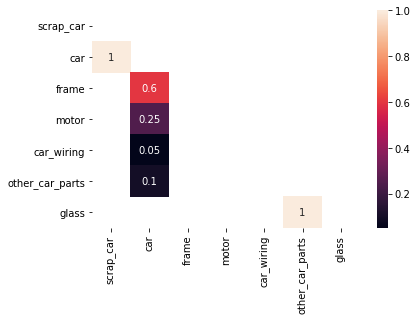

In [7]:
# Define the composition of some goods in terms of other goods
lay.goods = pd.read_excel(file_path, 'lay_good')#.fillna(0.0)
_pretty(lay.goods)

In `lay.goods`, we can see that a scrap_car contains 1 car; that a car contains frame, motor, etc.

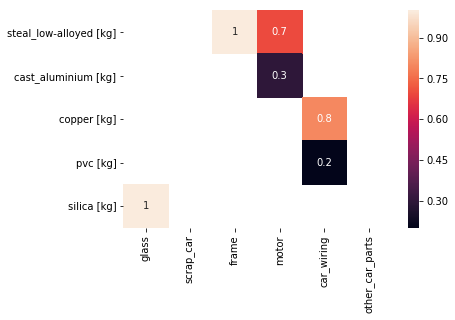

In [8]:
# Define the composition of goods in terms of substances
lay.subst = pd.read_excel(file_path, 'lay_subst')#.fillna(0.0)
_pretty(lay.subst)

Other goods, such as the frame, are defined in terms of their substance content in `lay.subst` above. It is worth noting that the columns of `lay.subst` and `lay.goods` do not perfectly match; the 'car' good is missing from the former, which does not matter, as dimensions are harmonized upon calculation.

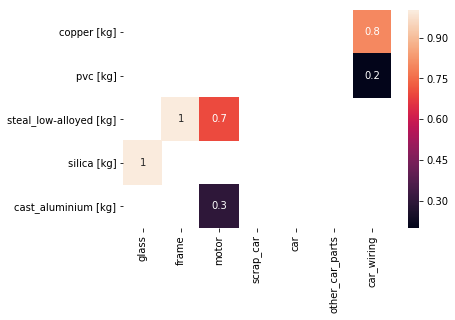

In [10]:
lay.harmonize_layers()
_pretty(lay.subst)

## Define conservative property layer `cons`

Here is the data we will read in (`data_in`). Note a few problems:
- steal_low-alloyed does not have a unit (missing "[kg]")
- steal_low-alloyed nas a null Total Mass, despite elemental components (Fe [kg]...) that contribute to mass
- cast_aluminium does not has a null Total Mass, despite being defined on a per-kilo basis ("[kg" unit)

In [13]:
data_in = pd.read_excel(file_path, 'lay_cons')#.fillna(0.0)
data_in

steal_low-alloyed  cast_aluminium [kg]  copper [kg]  \
C [kg]                        0.04                  NaN          NaN   
N [kg]                         NaN                  NaN          NaN   
H [kg]                         NaN                  NaN          NaN   
Cl [kg]                        NaN                  NaN          NaN   
Al [kg]                        NaN                 0.99          NaN   
Fe [kg]                       0.95                  NaN          NaN   
Cu [kg]                        NaN                 0.01          1.0   
Si [kg]                        NaN                  NaN          NaN   
O [kg]                         NaN                  NaN          NaN   
Ca [kg]                        NaN                  NaN          NaN   
S [kg]                         NaN                  NaN          NaN   
Energy [MJ]                    NaN                  NaN          NaN   
Total mass [kg]                NaN                  NaN          1.0   

                 pvc [kg]  cellulose [kg]  calcium_sulfate_dihydrate [kg]  \
C [kg]              0.384        0.444444                             NaN   
N [kg]                NaN             NaN                             NaN   
H [kg]              0.048        0.061728                        0.023256   
Cl [kg]             0.568             NaN                             NaN   
Al [kg]               NaN             NaN                             NaN   
Fe [kg]               NaN             NaN                             NaN   
Cu [kg]               NaN             NaN                             NaN   
Si [kg]               NaN             NaN                             NaN   
O [kg]                NaN        0.493827                        0.558140   
Ca [kg]               NaN             NaN                        0.232558   
S [kg]                NaN             NaN                        0.186047   
Energy [MJ]           NaN             NaN                             NaN   
Total mass [kg]     1.000        1.000000                        1.000000   

                 silica [kg]  
C [kg]                   NaN  
N [kg]                   NaN  
H [kg]                   NaN  
Cl [kg]                  NaN  
Al [kg]                  NaN  
Fe [kg]                  NaN  
Cu [kg]                  NaN  
Si [kg]             0.466667  
O [kg]              0.533333  
Ca [kg]                  NaN  
S [kg]                   NaN  
Energy [MJ]              NaN  
Total mass [kg]     1.000000

In [14]:
# We read in this data to define the conservative property layer
lay.cons = data_in
lay.cons

steal_low-alloyed  cast_aluminium [kg]  copper [kg]  \
Al [kg]                        NaN                 0.99          NaN   
C [kg]                        0.04                  NaN          NaN   
Ca [kg]                        NaN                  NaN          NaN   
Cl [kg]                        NaN                  NaN          NaN   
Cu [kg]                        NaN                 0.01          1.0   
Energy [MJ]                    NaN                  NaN          NaN   
Fe [kg]                       0.95                  NaN          NaN   
H [kg]                         NaN                  NaN          NaN   
N [kg]                         NaN                  NaN          NaN   
O [kg]                         NaN                  NaN          NaN   
S [kg]                         NaN                  NaN          NaN   
Si [kg]                        NaN                  NaN          NaN   
Total mass [kg]                NaN                  NaN          1.0   

                 pvc [kg]  cellulose [kg]  calcium_sulfate_dihydrate [kg]  \
Al [kg]               NaN             NaN                             NaN   
C [kg]              0.384        0.444444                             NaN   
Ca [kg]               NaN             NaN                        0.232558   
Cl [kg]             0.568             NaN                             NaN   
Cu [kg]               NaN             NaN                             NaN   
Energy [MJ]           NaN             NaN                             NaN   
Fe [kg]               NaN             NaN                             NaN   
H [kg]              0.048        0.061728                        0.023256   
N [kg]                NaN             NaN                             NaN   
O [kg]                NaN        0.493827                        0.558140   
S [kg]                NaN             NaN                        0.186047   
Si [kg]               NaN             NaN                             NaN   
Total mass [kg]     1.000        1.000000                        1.000000   

                 silica [kg]  C [kg] n.e.s.  Si [kg] n.e.s.  S [kg] n.e.s.  \
Al [kg]                  NaN            0.0             0.0            0.0   
C [kg]                   NaN            1.0             0.0            0.0   
Ca [kg]                  NaN            0.0             0.0            0.0   
Cl [kg]                  NaN            0.0             0.0            0.0   
Cu [kg]                  NaN            0.0             0.0            0.0   
Energy [MJ]              NaN            0.0             0.0            0.0   
Fe [kg]                  NaN            0.0             0.0            0.0   
H [kg]                   NaN            0.0             0.0            0.0   
N [kg]                   NaN            0.0             0.0            0.0   
O [kg]              0.533333            0.0             0.0            0.0   
S [kg]                   NaN            0.0             0.0            1.0   
Si [kg]             0.466667            0.0             1.0            0.0   
Total mass [kg]     1.000000            1.0             1.0            1.0   

                 O [kg] n.e.s.  Energy [MJ] n.e.s.  Al [kg] n.e.s.  \
Al [kg]                    0.0                 0.0             1.0   
C [kg]                     0.0                 0.0             0.0   
Ca [kg]                    0.0                 0.0             0.0   
Cl [kg]                    0.0                 0.0             0.0   
Cu [kg]                    0.0                 0.0             0.0   
Energy [MJ]                0.0                 1.0             0.0   
Fe [kg]                    0.0                 0.0             0.0   
H [kg]                     0.0                 0.0             0.0   
N [kg]                     0.0                 0.0             0.0   
O [kg]                     1.0                 0.0             0.0   
S [kg]                     0.0                 0.0             0.0

In [16]:
lay.harmonize_layers()
lay.subst

glass  frame  motor  scrap_car  car  \
copper [kg]                       NaN    NaN    NaN        NaN  NaN   
steal_low-alloyed [kg]            NaN    1.0    0.7        NaN  NaN   
S [kg] n.e.s.                     NaN    NaN    NaN        NaN  NaN   
silica [kg]                       1.0    NaN    NaN        NaN  NaN   
Cl [kg] n.e.s.                    NaN    NaN    NaN        NaN  NaN   
cast_aluminium [kg]               NaN    NaN    0.3        NaN  NaN   
H [kg] n.e.s.                     NaN    NaN    NaN        NaN  NaN   
Cu [kg] n.e.s.                    NaN    NaN    NaN        NaN  NaN   
calcium_sulfate_dihydrate [kg]    NaN    NaN    NaN        NaN  NaN   
N [kg] n.e.s.                     NaN    NaN    NaN        NaN  NaN   
cellulose [kg]                    NaN    NaN    NaN        NaN  NaN   
pvc [kg]                          NaN    NaN    NaN        NaN  NaN   
Energy [MJ] n.e.s.                NaN    NaN    NaN        NaN  NaN   
C [kg] n.e.s.                     NaN    NaN    NaN        NaN  NaN   
O [kg] n.e.s.                     NaN    NaN    NaN        NaN  NaN   
steal_low-alloyed                 NaN    NaN    NaN        NaN  NaN   
Ca [kg] n.e.s.                    NaN    NaN    NaN        NaN  NaN   
Si [kg] n.e.s.                    NaN    NaN    NaN        NaN  NaN   
Al [kg] n.e.s.                    NaN    NaN    NaN        NaN  NaN   
Fe [kg] n.e.s.                    NaN    NaN    NaN        NaN  NaN   

                                other_car_parts  car_wiring  
copper [kg]                                 NaN         0.8  
steal_low-alloyed [kg]                      NaN         NaN  
S [kg] n.e.s.                               NaN         NaN  
silica [kg]                                 NaN         NaN  
Cl [kg] n.e.s.                              NaN         NaN  
cast_aluminium [kg]                         NaN         NaN  
H [kg] n.e.s.                               NaN         NaN  
Cu [kg] n.e.s.                              NaN         NaN  
calcium_sulfate_dihydrate [kg]              NaN         NaN  
N [kg] n.e.s.                               NaN         NaN  
cellulose [kg]                              NaN         NaN  
pvc [kg]                                    NaN         0.2  
Energy [MJ] n.e.s.                          NaN         NaN  
C [kg] n.e.s.                               NaN         NaN  
O [kg] n.e.s.                               NaN         NaN  
steal_low-alloyed                           NaN         NaN  
Ca [kg] n.e.s.                              NaN         NaN  
Si [kg] n.e.s.                              NaN         NaN  
Al [kg] n.e.s.                              NaN         NaN  
Fe [kg] n.e.s.                              NaN         NaN

Above, it can be seen that a best guess was taken for the missing "Total Mass" entries, based on declared unit ("[kg]" in the case of cast aluminium, and based on the column-sum of mass entries for steal_low-alloyed.

Also, proxy substances have been created. For example, "Carbon, not elsewhere specified" can hold data on carbon contents of a good when we do not know in the form of what substance this element is.

In [8]:
lay.subst

glass  scrap_car  frame  motor  car_wiring  \
steal_low-alloyed [kg]    NaN        NaN    1.0    0.7         NaN   
cast_aluminium [kg]       NaN        NaN    NaN    0.3         NaN   
copper [kg]               NaN        NaN    NaN    NaN         0.8   
pvc [kg]                  NaN        NaN    NaN    NaN         0.2   
silica [kg]               1.0        NaN    NaN    NaN         NaN   

                        other_car_parts  
steal_low-alloyed [kg]              NaN  
cast_aluminium [kg]                 NaN  
copper [kg]                         NaN  
pvc [kg]                            NaN  
silica [kg]                         NaN

## Calculate net goods composition

In [18]:
lay.net_goods()

glass  frame  motor  scrap_car   car  other_car_parts  \
glass              1.0    0.0    0.0       0.10  0.10              1.0   
frame              0.0    1.0    0.0       0.60  0.60              0.0   
motor              0.0    0.0    1.0       0.25  0.25              0.0   
scrap_car          0.0    0.0    0.0       0.00  0.00              0.0   
car                0.0    0.0    0.0       0.00  0.00              0.0   
other_car_parts    0.0    0.0    0.0       0.00  0.00              0.0   
car_wiring         0.0    0.0    0.0       0.05  0.05              0.0   

                 car_wiring  
glass                   0.0  
frame                   0.0  
motor                   0.0  
scrap_car               0.0  
car                     0.0  
other_car_parts         0.0  
car_wiring              1.0

Here, we propagated the content of frame into car into scap_car, for example. To focus only on cells, with data, we clear null rows and columns as follows:

In [21]:
lay.net_goods(keep_self_reference=True)

glass  frame  motor  scrap_car   car  other_car_parts  \
glass              1.0    0.0    0.0       0.10  0.10              1.0   
frame              0.0    1.0    0.0       0.60  0.60              0.0   
motor              0.0    0.0    1.0       0.25  0.25              0.0   
scrap_car          0.0    0.0    0.0       0.00  0.00              0.0   
car                0.0    0.0    0.0       0.00  0.00              0.0   
other_car_parts    0.0    0.0    0.0       0.00  0.00              0.0   
car_wiring         0.0    0.0    0.0       0.05  0.05              0.0   

                 car_wiring  
glass                   0.0  
frame                   0.0  
motor                   0.0  
scrap_car               0.0  
car                     0.0  
other_car_parts         0.0  
car_wiring              1.0

In [11]:
lay.net_goods(abbreviate=True, keep_self_reference=False)

scrap_car  other_car_parts   car
motor            0.25              0.0  0.25
glass            0.10              1.0  0.10
car_wiring       0.05              0.0  0.05
frame            0.60              0.0  0.60

If we want to see all intermediate goods (e.g., there is a car in a scrap car; there are other_car_parts in car), simply tell it not to drop intermediates.

In [12]:
lay.net_goods(abbreviate=True, drop_intermediates=False)

motor  glass  car_wiring  scrap_car  frame  other_car_parts  \
motor              1.0    0.0         0.0       0.25    0.0              0.0   
glass              0.0    1.0         0.0       0.10    0.0              1.0   
car_wiring         0.0    0.0         1.0       0.05    0.0              0.0   
scrap_car          0.0    0.0         0.0       1.00    0.0              0.0   
frame              0.0    0.0         0.0       0.60    1.0              0.0   
other_car_parts    0.0    0.0         0.0       0.10    0.0              1.0   
car                0.0    0.0         0.0       1.00    0.0              0.0   

                  car  
motor            0.25  
glass            0.10  
car_wiring       0.05  
scrap_car        0.00  
frame            0.60  
other_car_parts  0.10  
car              1.00

## Calculate net substance and conservative properties compositions

In [22]:
lay.net_subst(abbreviate=True)


glass  frame  motor  scrap_car    car  \
copper [kg]               0.0    0.0    0.0      0.040  0.040   
steal_low-alloyed [kg]    0.0    1.0    0.7      0.775  0.775   
silica [kg]               1.0    0.0    0.0      0.100  0.100   
cast_aluminium [kg]       0.0    0.0    0.3      0.075  0.075   
pvc [kg]                  0.0    0.0    0.0      0.010  0.010   

                        other_car_parts  car_wiring  
copper [kg]                         0.0         0.8  
steal_low-alloyed [kg]              0.0         0.0  
silica [kg]                         1.0         0.0  
cast_aluminium [kg]                 0.0         0.0  
pvc [kg]                            0.0         0.2

In [23]:
lay.net_cons(abbreviate=True)


glass  motor  scrap_car       car  other_car_parts  \
Al [kg]          0.000000  0.297   0.074250  0.074250         0.000000   
C [kg]           0.000000  0.000   0.003840  0.003840         0.000000   
Cl [kg]          0.000000  0.000   0.005680  0.005680         0.000000   
Cu [kg]          0.000000  0.003   0.040750  0.040750         0.000000   
H [kg]           0.000000  0.000   0.000480  0.000480         0.000000   
O [kg]           0.533333  0.000   0.053333  0.053333         0.533333   
Si [kg]          0.466667  0.000   0.046667  0.046667         0.466667   
Total mass [kg]  1.000000  0.000   0.150000  0.150000         1.000000   

                 car_wiring  
Al [kg]              0.0000  
C [kg]               0.0768  
Cl [kg]              0.1136  
Cu [kg]              0.8000  
H [kg]               0.0096  
O [kg]               0.0000  
Si [kg]              0.0000  
Total mass [kg]      1.0000

## Expand

We can add a new product ("foo") with its own substance composition, and the different layers adapt their dimensions are are readily recalculated.

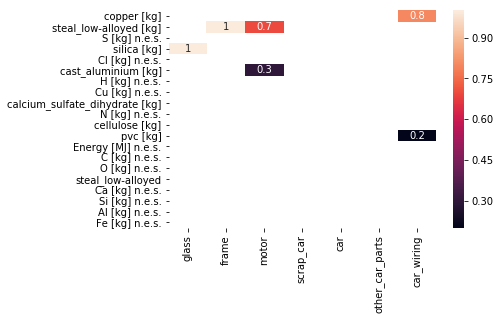

In [24]:
_pretty(lay.subst)

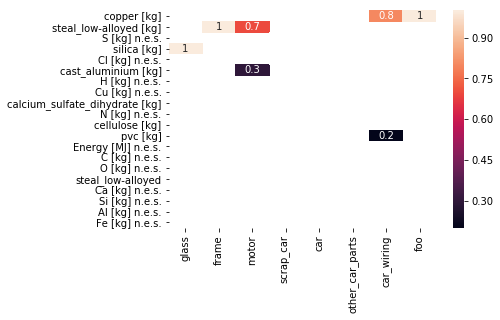

In [25]:
new_data = pd.DataFrame([1], index=['copper [kg]'], columns=['foo'])
lay.add_layer_data(subst=new_data)
_pretty(lay.subst)

In [26]:
lay.net_goods()

glass  frame  motor  scrap_car   car  other_car_parts  \
glass              1.0    0.0    0.0       0.10  0.10              1.0   
frame              0.0    1.0    0.0       0.60  0.60              0.0   
motor              0.0    0.0    1.0       0.25  0.25              0.0   
scrap_car          0.0    0.0    0.0       0.00  0.00              0.0   
car                0.0    0.0    0.0       0.00  0.00              0.0   
other_car_parts    0.0    0.0    0.0       0.00  0.00              0.0   
car_wiring         0.0    0.0    0.0       0.05  0.05              0.0   
foo                0.0    0.0    0.0       0.00  0.00              0.0   

                 car_wiring  foo  
glass                   0.0  0.0  
frame                   0.0  0.0  
motor                   0.0  0.0  
scrap_car               0.0  0.0  
car                     0.0  0.0  
other_car_parts         0.0  0.0  
car_wiring              1.0  0.0  
foo                     0.0  1.0

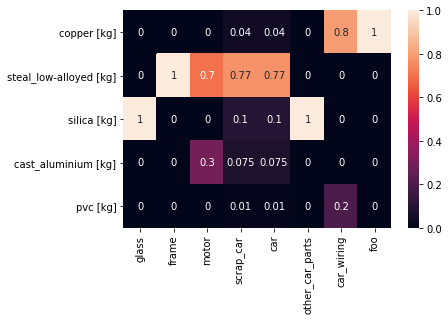

In [27]:
_pretty(
    lay.net_subst(abbreviate=True)
)

In [28]:
lay.net_cons(abbreviate=True)

glass  motor  scrap_car       car  other_car_parts  \
Al [kg]          0.000000  0.297   0.074250  0.074250         0.000000   
C [kg]           0.000000  0.000   0.003840  0.003840         0.000000   
Cl [kg]          0.000000  0.000   0.005680  0.005680         0.000000   
Cu [kg]          0.000000  0.003   0.040750  0.040750         0.000000   
H [kg]           0.000000  0.000   0.000480  0.000480         0.000000   
O [kg]           0.533333  0.000   0.053333  0.053333         0.533333   
Si [kg]          0.466667  0.000   0.046667  0.046667         0.466667   
Total mass [kg]  1.000000  0.000   0.150000  0.150000         1.000000   

                 car_wiring  foo  
Al [kg]              0.0000  0.0  
C [kg]               0.0768  0.0  
Cl [kg]              0.1136  0.0  
Cu [kg]              0.8000  1.0  
H [kg]               0.0096  0.0  
O [kg]               0.0000  0.0  
Si [kg]              0.0000  0.0  
Total mass [kg]      1.0000  1.0

## Modifying existing product description

Demo, and perparing for unittest

In [3]:
import imp
imp.reload(layers)
subst0 = read_tbl("""
                 | thing1 | thing2
-----------------+--------+--------
steel            |        | 8.
plastic          | 4      | 0.0
glass            | 5.     | 1.
Cl [kg] n.e.s.   | 1.     | 
mass [kg] n.e.s. |        |
""", 'float')
subst0 = subst0.apply(pd.to_numeric)

In [31]:
mini = layers.Layers()
mini.subst = subst0

#updated_subst = insert_values_except_nans(subst, ins)
#check_insertion_rule(subst, updated_subst, 'update_nan')
mini.add_layer_data(subst=ins, how='update_nan')
_ = to_table_command(mini.subst)

NameError: name 'ins' is not defined

In [67]:
layers._check_insertion_rule(subst0, mini.subst, 'update_nan')

In [4]:
mini = layers.Layers()
mini.subst = subst0
ins = read_tbl("""
                 | thing1 | thing2
-----------------+--------+--------
steel            | 5.     |  8

""", 'float')
mini.add_layer_data(subst=ins, how='update_nan')
#updated_subst = insert_values_except_nans(subst, ins)
#check_insertion_rule(subst, updated_subst, 'update_nan')
#updated_subst
_ = to_table_command(mini.subst)

 = read_tbl(""" 
                  |   thing1 |   thing2
------------------+----------+----------
 steel            |        5 |        8
 plastic          |        4 |        0
 glass            |        5 |        1
 Cl [kg] n.e.s.   |        1 |      nan
 mass [kg] n.e.s. |      nan |      nan
""", dtype='float64')


In [5]:
layers._check_insertion_rule(subst0, mini.subst, 'update_nan')

In [6]:
mini = layers.Layers()
mini.subst = subst0
ins = read_tbl("""
                 | thing1 | thing2
-----------------+--------+--------
steel            | 5.     | 999

""", 'float')
try:
    mini.add_layer_data(subst=ins, how='update_nan')
except ValueError as e:
    print(e)


Actual (non-NaN) layer data would get overwritten. See difference: 
 DataFrame.iloc[:, 1] are different

DataFrame.iloc[:, 1] values are different (100.0 %)
[left]:  [999.0]
[right]: [8.0]


In [7]:
mini.add_layer_data(subst=ins, how='loose')
import unittest
test = unittest.TestCase()
with test.assertRaises(ValueError):
    layers._check_insertion_rule(subst0, mini.subst, 'update_nan')
    
# Other assertion: in this specific case should be fine
layers._check_insertion_rule(subst0, mini.subst, 'loose')
layers._check_insertion_rule(subst0, mini.subst, 'update_nan_nes')

In [8]:
mini = layers.Layers()
mini.subst = subst0
ins = read_tbl("""
                 | thing1 | thing2
-----------------+--------+--------
Cl [kg] n.e.s.   | 2.     | 2.
mass [kg] n.e.s. |        | 3.1416
""", 'float')
mini.add_layer_data(subst=ins, how='update_nan_or_nes')
_ = to_table_command(mini.subst)

 = read_tbl(""" 
                  |   thing1 |   thing2
------------------+----------+----------
 steel            |      nan |   8
 plastic          |        4 |   0
 glass            |        5 |   1
 Cl [kg] n.e.s.   |        2 |   2
 mass [kg] n.e.s. |      nan |   3.1416
""", dtype='float64')


In [9]:
mini = layers.Layers()
mini.subst = subst0
ins = read_tbl("""
                 | thing1 | thing2
-----------------+--------+--------
Cl [kg] n.e.s.   | 2.     | 2.
mass [kg] n.e.s. |        | 3.1416
""", 'float')
try:
    mini.add_layer_data(subst=ins, how='update_nan')
except ValueError as e:
    print(str(e))

Actual (non-NaN) layer data would get overwritten. See difference: 
 DataFrame.iloc[:, 0] are different

DataFrame.iloc[:, 0] values are different (50.0 %)
[left]:  [2.0, nan]
[right]: [1.0, nan]


In [37]:
# loose
mini = layers.Layers()
mini.subst = subst0
# Note how Cl content thing1 is unknown on insert
ins = read_tbl("""
                 | thing1 | thing2
-----------------+--------+--------
Cl [kg] n.e.s.   |        | 2.
mass [kg] n.e.s. |        | 3.1416
""", 'float')
mini.add_layer_data(subst=ins)
# and becomes unknown in the final version. A NaN overwrite a value
mini.subst

thing1  thing2
                                 
steel                 NaN  8.0000
plastic               4.0  0.0000
glass                 5.0  1.0000
Cl [kg] n.e.s.        NaN  2.0000
mass [kg] n.e.s.      NaN  3.1416

In [38]:
# loose
mini = layers.Layers()
mini.subst = subst0
ins = read_tbl("""
                 | thing3 | thing4
-----------------+--------+--------
Br [kg] n.e.s.   |        | 2.
""", 'float')
mini.add_layer_data(subst=ins)
# and becomes unknown in the final version
_ = to_table_command(mini.subst)

 = read_tbl(""" 
                  |   thing1 |   thing2 |   thing3 |   thing4
------------------+----------+----------+----------+----------
 steel            |      nan |        8 |      nan |      nan
 plastic          |        4 |        0 |      nan |      nan
 glass            |        5 |        1 |      nan |      nan
 Cl [kg] n.e.s.   |        1 |      nan |      nan |      nan
 mass [kg] n.e.s. |      nan |      nan |      nan |      nan
 Br [kg] n.e.s.   |      nan |      nan |      nan |        2
""", dtype='float64')


In [39]:
# loose
mini = layers.Layers()
mini.subst = subst0
ins = read_tbl("""
                 | thing1 | thing4
-----------------+--------+--------
Br [kg] n.e.s.   |  3     | 2.
""", 'float')
mini.add_layer_data(subst=ins)
# Refuses on partial column overlap
mini.subst

Warning, these columns already exist: {'thing1'}


thing1  thing2
                                 
steel                 NaN     8.0
plastic               4.0     0.0
glass                 5.0     1.0
Cl [kg] n.e.s.        1.0     NaN
mass [kg] n.e.s.      NaN     NaN

In [40]:
ins = read_tbl("""
                 | thing1 | thing2
-----------------+--------+--------
steel            | 5.     | 
Cl [kg] n.e.s.   |        | 2.
""", 'float')
ready = layers._prepare_insert_for_data_update(ins, subst0, how='update_nan')
_ = to_table_command(ready)

 = read_tbl(""" 
                |   thing1 |   thing2
----------------+----------+----------
 steel          |        5 |        8
 Cl [kg] n.e.s. |        1 |        2
""", dtype='float64')


In [41]:
# unittest potecting value of steel
ins = read_tbl("""
                 | thing1 | thing2
-----------------+--------+--------
steel            | 5.     | 999
Cl [kg] n.e.s.   |        | 2.
""", 'float')
try:
    ready = layers._prepare_insert_for_data_update(ins, subst0, how='update_nan')
except ValueError as e:
    print(e)

Actual (non-NaN) layer data would get overwritten. See difference: 
 DataFrame.iloc[:, 1] are different

DataFrame.iloc[:, 1] values are different (50.0 %)
[left]:  [999.0, nan]
[right]: [8.0, nan]


In [42]:
# unittest potecting n.e.s.
ins = read_tbl("""
                 | thing1 | thing2
-----------------+--------+--------
steel            | 5.     | 
Cl [kg] n.e.s.   | 3.     | 2.
""", 'float')
try:
    ready = layers._prepare_insert_for_data_update(ins, subst0, how='update_nan')
except ValueError as e:
    print(e)

Actual (non-NaN) layer data would get overwritten. See difference: 
 DataFrame.iloc[:, 0] are different

DataFrame.iloc[:, 0] values are different (50.0 %)
[left]:  [nan, 3.0]
[right]: [nan, 1.0]


In [43]:
# overriding n.e.s for Cl of thing 1
ins = read_tbl("""
                 | thing1 | thing2
-----------------+--------+--------
steel            | 5.     | 
Cl [kg] n.e.s.   | 999    | 2.
""", 'float')
ready = layers._prepare_insert_for_data_update(ins, subst0, how='update_nan_or_nes')
_ = to_table_command(ready)

 = read_tbl(""" 
                |   thing1 |   thing2
----------------+----------+----------
 steel          |        5 |        8
 Cl [kg] n.e.s. |      999 |        2
""", dtype='float64')


## Check sanity

A the composition of a good can be described in terms of its content of other goods, *or* in terms of its content in substances, but *not* both! Let us try to put a 'car' inside 'foo', which we just defined in terms of its substance content.

In [44]:
lay.goods.loc['car', 'foo'] = 1

Now if we try to calculate anything involving substances, we get a value error to avoid double-counting and confusion:

In [45]:
try:
    lay.net_subst()
except ValueError as err:
    print(err)

The composition of the following goods is expressed *both* in terms of other goods *and* of substances, leading to confusion and risk of double counting: {'foo'}


## Filter for physical quantities

Looks for keywords in reference property (value, etc.), the units (USD, $, etc.), and the indexes of l_subst, to filter out non-physical substances

In [46]:
lay = layers.Layers()
lay.l_subst = read_tbl("""
                         | name   | reference_property   | unit
        -----------------+--------+----------------------+---------
         subst1 [kg]     | subst1 | mass                 | kg
         subst2 [kg]     | subst2 | mass                 | kg
         foo1 [USD]      | foo1   | bar                  | USD
         foo2 [$]        | foo2   | bar                  | $
         foo4 [Euros]    | foo4   | bar                  | Euros
         foo5 [CAD]      | foo5   | bar                  | CAD
         foo6 [Dollar]   | foo6   | bar                  | Dollar
         foo7 [pistole]  | foo7   | economic value       | pistole
         foo8 [pistole]  | foo8   | price                | pistole
         foo9 [pistole]  | foo9   | value                | pistole
         foo10 [pistole] | foo10  | valeur               | pistole
         foo11 [pistole] | foo11  | prix                 | pistole""", dtype='object')

lay.l_pro = read_tbl(""" 
               | name          | reference_property   | unit
---------------+---------------+----------------------+--------
 goods1        | goods1        | mass                 | kg
 goods2        | goods2        | unit                 | unit
 goods_service | goods_service | value                | $
 goods3        | goods3        | value                | $
""", dtype='object')

lay.subst = pd.DataFrame(index=lay.l_subst.index,
                         columns=['goods1', 'goods2']).fillna(1.0)
lay.subst.loc['foo5 [CAD]', 'goods_service'] = 2
lay.goods = pd.DataFrame(index=['goods1'], columns=['goods3'], data=[0.5])


Without the filter:

In [47]:
lay.subst

goods1  goods2  goods_service
                                                        
subst1 [kg]                   1.0     1.0            NaN
subst2 [kg]                   1.0     1.0            NaN
foo1 [USD]                    1.0     1.0            NaN
foo2 [$]                      1.0     1.0            NaN
foo4 [Euros]                  1.0     1.0            NaN
foo5 [CAD]                    1.0     1.0            2.0
foo6 [Dollar]                 1.0     1.0            NaN
foo7 [pistole]                1.0     1.0            NaN
foo8 [pistole]                1.0     1.0            NaN
foo9 [pistole]                1.0     1.0            NaN
foo10 [pistole]               1.0     1.0            NaN
foo11 [pistole]               1.0     1.0            NaN

With the filter:

In [48]:
lay.substp

goods1  goods2  goods_service
                                                        
foo7 [pistole]                1.0     1.0            NaN
foo10 [pistole]               1.0     1.0            NaN
subst2 [kg]                   1.0     1.0            NaN
foo11 [pistole]               1.0     1.0            NaN
foo8 [pistole]                1.0     1.0            NaN
subst1 [kg]                   1.0     1.0            NaN
foo9 [pistole]                1.0     1.0            NaN

In [49]:
lay.net_substp()

goods3  goods_service  goods1  goods2
                                                                
foo7 [pistole]                0.5            0.0     1.0     1.0
foo10 [pistole]               0.5            0.0     1.0     1.0
subst2 [kg]                   0.5            0.0     1.0     1.0
foo11 [pistole]               0.5            0.0     1.0     1.0
foo8 [pistole]                0.5            0.0     1.0     1.0
subst1 [kg]                   0.5            0.0     1.0     1.0
foo9 [pistole]                0.5            0.0     1.0     1.0

Of course, a list of sting recognition keywords cannot be expected to catch everything, but there is a test for what we truly want to avoid: sign discrepancies within substp. Here we make one "physical" unit go in the opposite direction relative to the others (which is of course not physically possible and an indicator that at least one dimension is either erroneous or in monetary units with a negative price):

In [52]:

lay_bad = copy.deepcopy(lay)
lay_bad.subst.loc['subst1 [kg]', 'goods_service'] = -1
lay_bad.subst.loc['subst2 [kg]', 'goods_service'] = +100
try:
    lay_bad.substp
except ValueError as e:
    print(str(e))

The following columns have contradictory signs, indicating that some monetary properties have likely not been caught by the default filters: Index(['goods_service'], dtype='object').


In [ ]:
bo[~bo].index